In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/ProUser/Documents/TSFN Datathon/Food Balance/rice_only (FP n FW)1.csv")
df.head()

,Area,Item,Year,Unit,Losses,Production,Loss Percentage
0,Afghanistan,Rice and products,Y2010,1000 tonnes,47.0,672.0,6.99
1,Afghanistan,Rice and products,Y2011,1000 tonnes,47.0,672.0,6.99
2,Afghanistan,Rice and products,Y2012,1000 tonnes,35.0,500.0,7.00
3,Afghanistan,Rice and products,Y2013,1000 tonnes,36.0,512.0,7.03
4,Afghanistan,Rice and products,Y2014,1000 tonnes,36.0,537.0,6.70


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
df['Year'] = df['Year'].str.replace('Y', '').astype(int)


In [ ]:
import pandas as pd

historical_years = range(2010, 2021)
future_years = range(2021, 2030)

forecast_data_all = pd.DataFrame()

for area, data_group in df.groupby('Area'):
    if len(data_group) < 3:
        continue

    model = ARIMA(data_group['Loss Percentage'], order=(1, 1, 1))
    model_fit = model.fit()

    historical_forecast_values = model_fit.predict(start=0, end=len(historical_years) - 1, typ='levels')

    historical_forecast_data_area = pd.DataFrame({'Year': historical_years, 'Loss Percentage': historical_forecast_values, 'Area': area})

    forecast_data_all = pd.concat([forecast_data_all, historical_forecast_data_area], ignore_index=True)

    model = ARIMA(data_group['Loss Percentage'], order=(1, 1, 1))
    model_fit = model.fit()

    future_forecast_values = model_fit.forecast(steps=len(future_years))

    future_forecast_data_area = pd.DataFrame({'Year': future_years, 'Loss Percentage': future_forecast_values, 'Area': area})

    forecast_data_all = pd.concat([forecast_data_all, future_forecast_data_area], ignore_index=True)



c:\Users\ProUser\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ProUser\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ProUser\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ProUser\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ProUser\AppData\Local\Programs\Python\Pytho

In [ ]:
forecast_data_all['Loss Percentage'] = forecast_data_all['Loss Percentage'].round(2)
forecast_data_all.to_csv("forecasted_loss_percentage.csv", index=False)


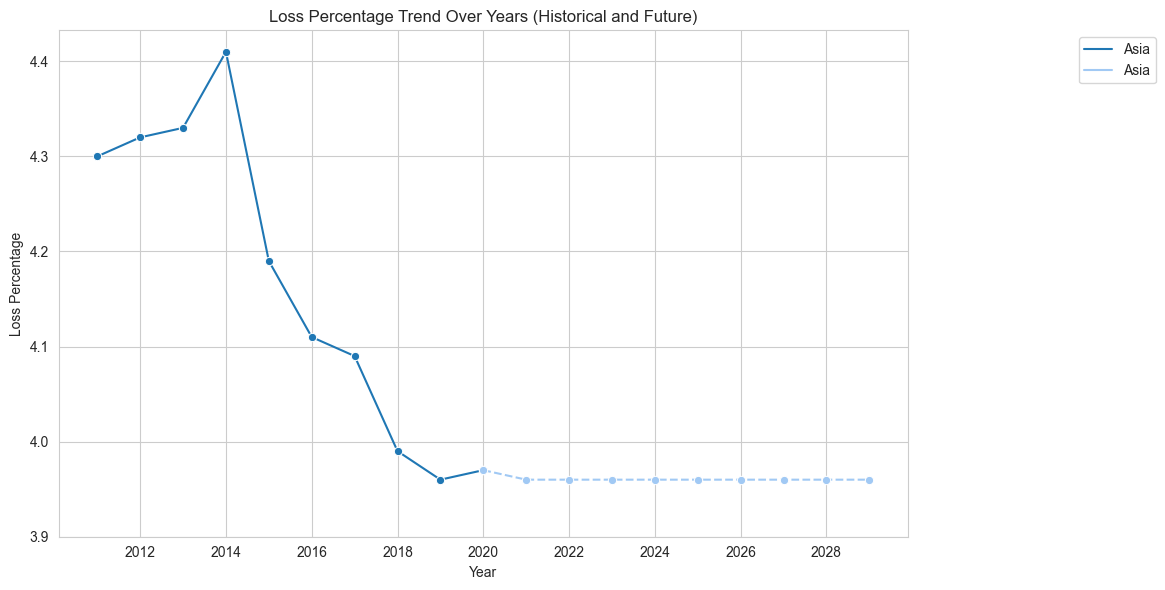

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = pd.read_csv("C:/Users/ProUser/Documents/TSFN Datathon/Food Balance/forecasted_loss_percentage.csv")
forecast_data_all = data[(data['Area'] == 'Asia') & (data['Loss Percentage'] != 0)]

historical_years = range(2010, 2021)
future_years = range(2020, 2030)

historical_data = forecast_data_all[forecast_data_all['Year'].isin(historical_years)]
future_data = forecast_data_all[forecast_data_all['Year'].isin(future_years)]

historical_data.loc[:, 'Year'] = historical_data['Year'].round().astype(int)
future_data.loc[:, 'Year'] = future_data['Year'].round().astype(int)

plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Loss Percentage', hue='Area', data=historical_data, palette='tab10', marker='o', linestyle='-')

sns.lineplot(x='Year', y='Loss Percentage', hue='Area', data=future_data, palette='pastel', marker='o', linestyle='--')

plt.xlabel('Year')
plt.ylabel('Loss Percentage')
plt.title('Loss Percentage Trend Over Years (Historical and Future)')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.ylim(3.9, plt.ylim()[1])
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.tight_layout()
plt.grid(True)
plt.show()


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2820 entries, 0 to 2819
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             2820 non-null   int64  
 1   Loss Percentage  2820 non-null   float64
 2   Area             2820 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 66.2+ KB


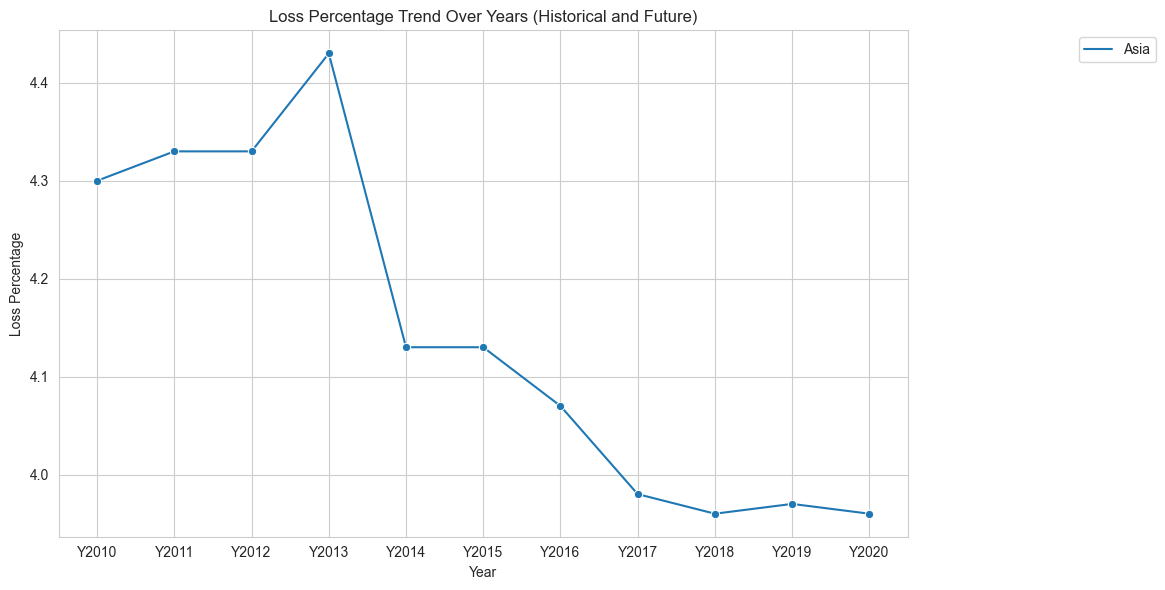

In [ ]:
historical = pd.read_csv("C:/Users/ProUser/Documents/TSFN Datathon/Food Balance/rice_only (FP n FW)1.csv")
historical = historical[historical['Area'] == 'Asia']
# Create a line graph for historical data
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Loss Percentage', hue='Area', data=historical, palette='tab10', marker='o', linestyle='-')


plt.xlabel('Year')
plt.ylabel('Loss Percentage')
plt.title('Loss Percentage Trend Over Years (Historical and Future)')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.tight_layout()
plt.grid(True)
plt.show()